In [36]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import numpy as np
import seaborn as sns
from scipy import stats
import requests
import json
import matplotlib.pyplot as plt
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

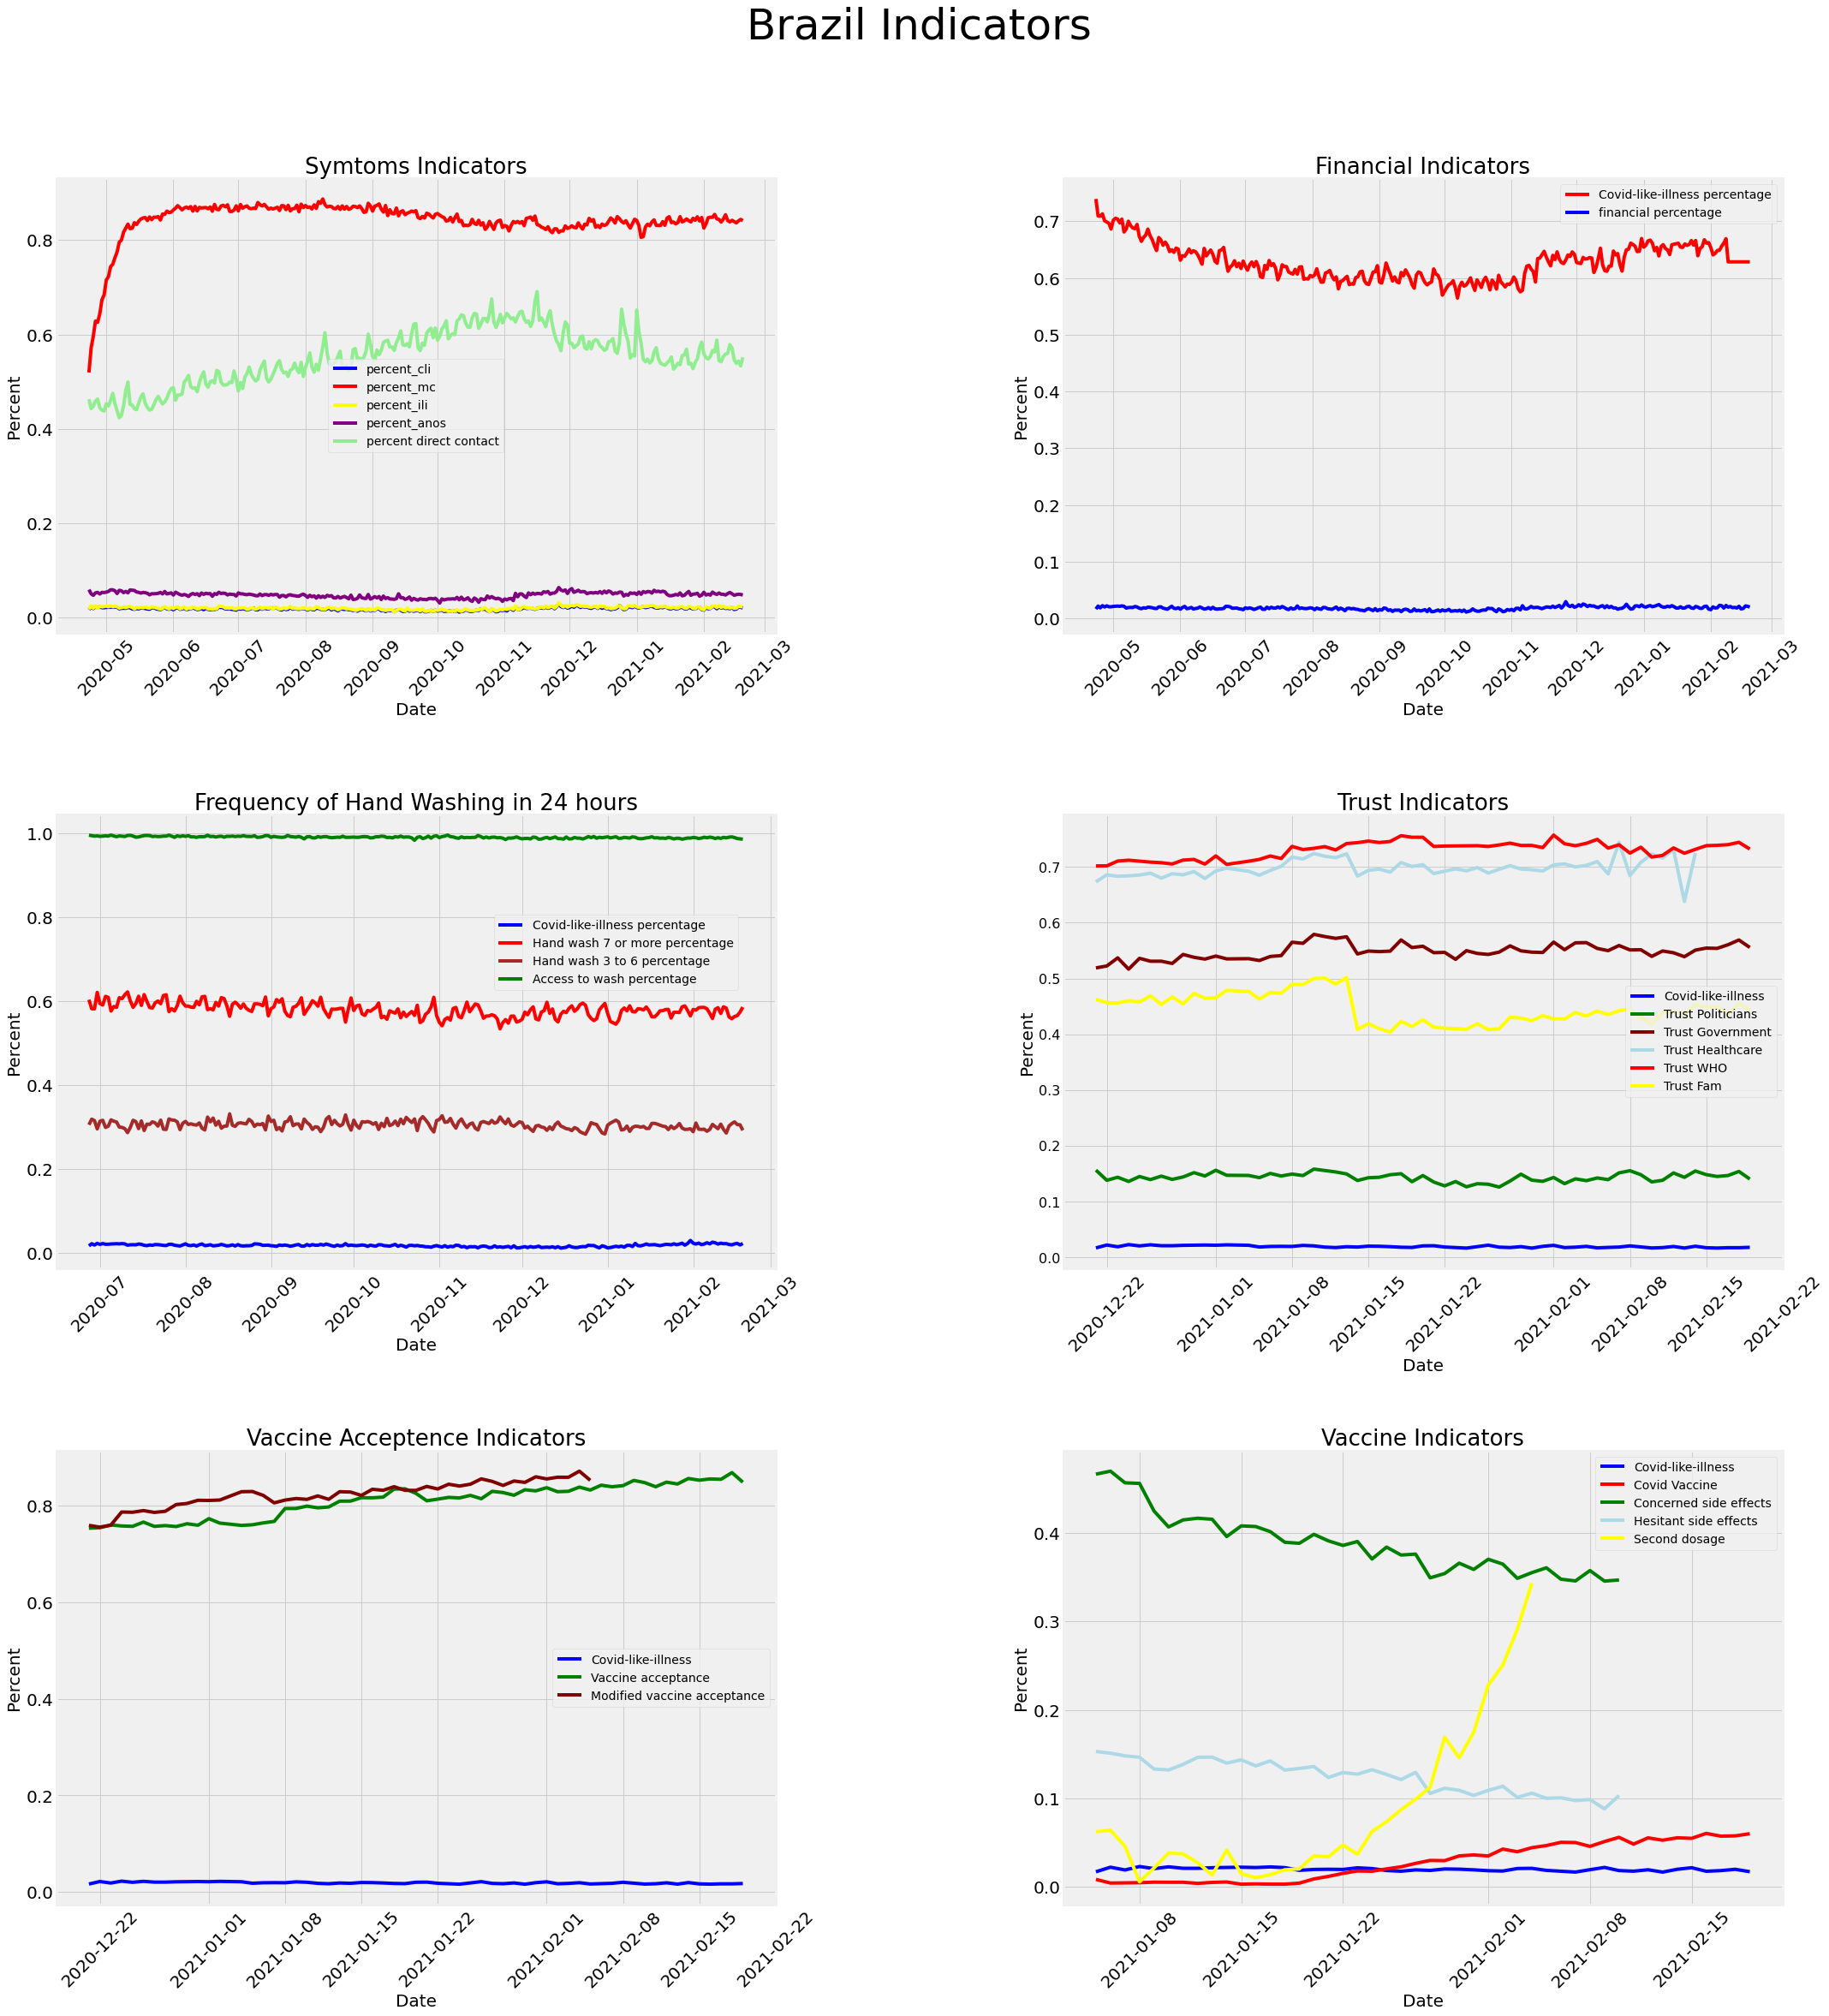

In [37]:
"""
download the csv file from github, run the program, and make sure the csv file and this program are in same folder.
Here the iso codes: ['BRA', 'HKG', 'IND', 'NZL', 'KOR', 'TWN', 'GBR', 'USA']
Before you go to next conuntry make sure to change the survey date for that particular country.
For example, next country is India, then:
    first open the all_data1.csv
    second,
    for clidf
    find (ctrl-F) cli_IND and click the survey_date_IND (next column to cli_IND)
    
    for trustdf
    find fam_IND
    
    for vaccinedf
    find vaccine_IND
    
    for acceptancedf
    find vu_IND
    
    for financedf
    find hf_IND
    
    Copy that survey_date header should look like 'survey_dateBRA015'
    and paste it in index_col and parse_dates
    
NOTE: copy the code below and modified the copied code
    
"""

clidf = pd.read_csv('all_data1.csv', index_col='survey_dateBRA015', parse_dates=['survey_dateBRA015'])
clidf = clidf.drop(columns=[col for col in clidf.columns if col.startswith('survey')])
clidf = clidf.apply(lambda x: x.fillna(x.mean()),axis=0)
clidf.index = clidf.index.rename('survey_date') 
# please do these steps for other variables below and if you see a straight lines let me know

trustdf = pd.read_csv('all_data1.csv', index_col='survey_dateBRA915', parse_dates=['survey_dateBRA915'])
handdf = pd.read_csv('all_data1.csv', index_col='survey_dateBRA1615', parse_dates=['survey_dateBRA1615'])
vaccinedf = pd.read_csv('all_data1.csv', index_col='survey_dateBRA815', parse_dates=['survey_dateBRA815'])
acceptancedf= pd.read_csv('all_data1.csv', index_col='survey_dateBRA615', parse_dates=['survey_dateBRA615'])
financedf = pd.read_csv('all_data1.csv', index_col='survey_dateBRA415', parse_dates=['survey_dateBRA415'])



"""
Change the legend names more readable
"""

fig, axs = plt.subplots(3,2, figsize=(35,35))
#fig.tight_layout()
fig.suptitle('Brazil Indicators', fontsize=50)

#clidf data here
axs[0,0].plot(clidf.index, clidf['percent_cli_BRA'], color='blue')
axs[0,0].plot(clidf.index, clidf['percent_mc_BRA'], color='Red')
axs[0,0].plot(clidf.index, clidf['percent_ili_BRA'], color='yellow')
axs[0,0].plot(clidf.index, clidf['percent_anos_BRA'], color='purple')
axs[0,0].plot(clidf.index, clidf['percent_dc_BRA'], color='lightgreen')

axs[0,0].legend(('percent_cli', 'percent_mc', 'percent_ili', 'percent_anos', 'percent direct contact'), loc=0, fontsize=14)
plt.sca(axs[0,0])
plt.title('Symtoms Indicators', fontsize=26)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Percent',fontsize = 20)

axs[0,1].plot(clidf.index, clidf['percent_hf_BRA'], color='Red')
axs[0,1].plot(clidf.index, clidf['percent_cli_BRA'], color='blue')
axs[0,1].legend(('Covid-like-illness percentage', 'financial percentage'), loc=0, fontsize=14)
plt.sca(axs[0,1])
plt.title('Financial Indicators',fontsize=26)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Percent',fontsize = 20)
axs[1,0].plot(handdf.index, handdf['percent_cli_BRA'], color='blue')
axs[1,0].plot(handdf.index, handdf['pct_wash_hands_24h_7ormore_BRA'], color='red')
axs[1,0].plot(handdf.index, handdf['pct_wash_hands_24h_3to6_BRA'], color='brown')
axs[1,0].plot(handdf.index, handdf['pct_access_wash_BRA'], color='green')
axs[1,0].legend(('Covid-like-illness percentage', 'Hand wash 7 or more percentage', 
                 'Hand wash 3 to 6 percentage', 'Access to wash percentage'), bbox_to_anchor=(0.6,0.6), fontsize=14)
plt.sca(axs[1,0])
plt.title('Frequency of Hand Washing in 24 hours', fontsize=26)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Percent',fontsize = 20)

axs[1,1].plot(trustdf.index, trustdf['percent_cli_BRA'], color='blue')
#plt.plot(trustdf.index, trustdf['pct_trust_fam_BRA'], color='Red')
axs[1,1].plot(trustdf.index, trustdf['pct_trust_politicians_BRA'], color='green')
axs[1,1].plot(trustdf.index, trustdf['pct_trust_govt_BRA'], color='maroon')
axs[1,1].plot(trustdf.index, trustdf['pct_trust_healthcare_BRA'], color='lightblue')
axs[1,1].plot(trustdf.index, trustdf['pct_trust_who_BRA'], color='red')
axs[1,1].plot(trustdf.index, trustdf['pct_trust_fam_BRA'], color='yellow')
axs[1,1].legend(('Covid-like-illness', 'Trust Politicians', 'Trust Government', 'Trust Healthcare', 'Trust WHO', 'Trust Fam'), loc=0, fontsize=14)
plt.sca(axs[1,1])
plt.title('Trust Indicators',fontsize=26)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Percent',fontsize = 20)

axs[2,0].plot(acceptancedf.index, acceptancedf['percent_cli_BRA'], color='blue')
axs[2,0].plot(acceptancedf.index, acceptancedf['percent_vu_BRA'], color='green')
axs[2,0].plot(acceptancedf.index, acceptancedf['pct_modified_acceptance_BRA'], color='maroon')
axs[2,0].legend(('Covid-like-illness', 'Vaccine acceptance', 'Modified vaccine acceptance'), loc=0, fontsize=14)
plt.sca(axs[2,0])
plt.title('Vaccine Acceptence Indicators',fontsize=26)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Percent',fontsize = 20)

axs[2,1].plot(vaccinedf.index, vaccinedf['percent_cli_BRA'], color='blue')
axs[2,1].plot(vaccinedf.index, vaccinedf['pct_covid_vaccine_BRA'], color='red')
axs[2,1].plot(vaccinedf.index, vaccinedf['pct_concerned_sideeffects_BRA'], color='green')
axs[2,1].plot(vaccinedf.index, vaccinedf['pct_hesitant_sideeffects_BRA'], color='lightblue')
axs[2,1].plot(vaccinedf.index, vaccinedf['pct_twodoses_BRA'], color='yellow')
axs[2,1].legend(('Covid-like-illness', 'Covid Vaccine', 'Concerned side effects', 'Hesitant side effects', 'Second dosage'), loc = 0, fontsize=14)
plt.sca(axs[2,1])
plt.title('Vaccine Indicators',fontsize=26)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Percent',fontsize = 20)

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 
plt.show()